## Data Description:
Amazon Reviews data ( data source ) The repository has several
datasets. For this case study, we are using the Electronics
dataset.

## Domain:
E-commerce

## Context:
Online E-commerce websites like Amazon, Flipkart uses
different recommendation models to provide different
suggestions to different users. Amazon currently uses
item-to-item collaborative filtering, which scales to massive
data sets and produces high-quality recommendations in
real-time.

## Attribute Information:
● userId : Every user identified with a unique id
● productId : Every product identified with a unique id
● Rating : Rating of the corresponding product by
the corresponding user
● timestamp : Time of the rating ( ignore this column
for this exercise)

## Objective:
Build a recommendation system to recommend products to
customers based on the their previous ratings for other
products.

## 1. Exploratory Data Analysis

In [1]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [32]:
#Read the dataset and assigning new column name to the 

rating_data=pd.read_csv("books.csv", usecols=['customer_id', 'product_id','star_rating','review_date'])

In [33]:
#Display the dataset
rating_data = rating_data.rename(columns = {'customer_id':'userId', 'product_id':'productId','star_rating':'Rating','review_date':'timestamp'})
rating_data.head()

,userId,productId,Rating,timestamp
0,25933450,0439873800,5,2015-08-31
1,1801372,1623953553,5,2015-08-31
2,5782091,142151981X,5,2015-08-31
3,32715830,014241543X,5,2015-08-31
4,14005703,1604600527,5,2015-08-31


In [34]:
type(rating_data.timestamp[5])

str

In [35]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319090 entries, 0 to 10319089
Data columns (total 4 columns):
userId       int64
productId    object
Rating       int64
timestamp    object
dtypes: int64(2), object(2)
memory usage: 314.9+ MB


In [36]:
#Shape of the data
rating_data.shape

(10319090, 4)

In [37]:
#Five point summary 
rating_data.describe()['Rating'].T

count    1.031909e+07
mean     4.447514e+00
std      1.033987e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [38]:
## just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(rating_data.isnull().any()))

No of Nan values in our dataframe :  0


In [39]:
#Removing duplicates from the data
dup_bool = rating_data.duplicated(['userId','productId','Rating'], keep='first')
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 664 duplicate rating entries in the data..


In [40]:
#Basic Statistics

print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",rating_data.shape[0])
print("Total No of Users   :", len(np.unique(rating_data.userId)))
print("Total No of products  :", len(np.unique(rating_data.productId)))

Total data 
--------------------------------------------------

Total no of ratings : 10319090
Total No of Users   : 4632497
Total No of products  : 2274543


In [41]:
#Dropping the Timestamp column

rating_data.drop(['timestamp'], axis=1,inplace=True)

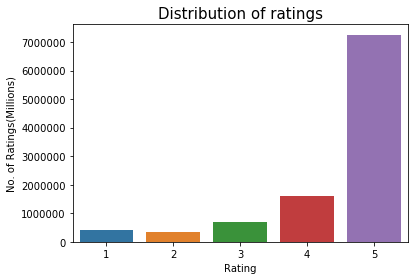

In [42]:
#Distribution of rating 

fig, ax = plt.subplots()
plt.title('Distribution of ratings', fontsize=15)
sns.countplot(rating_data.Rating)
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()

In [43]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = rating_data.groupby(by='userId')['Rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

userId
52004451    7962
50732546    3743
46877221    3402
38002140    2583
36642996    2285
Name: Rating, dtype: int64

In [44]:
no_of_rated_products_per_user.describe()

count    4.632497e+06
mean     2.227544e+00
std      8.392909e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.962000e+03
Name: Rating, dtype: float64

In [45]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

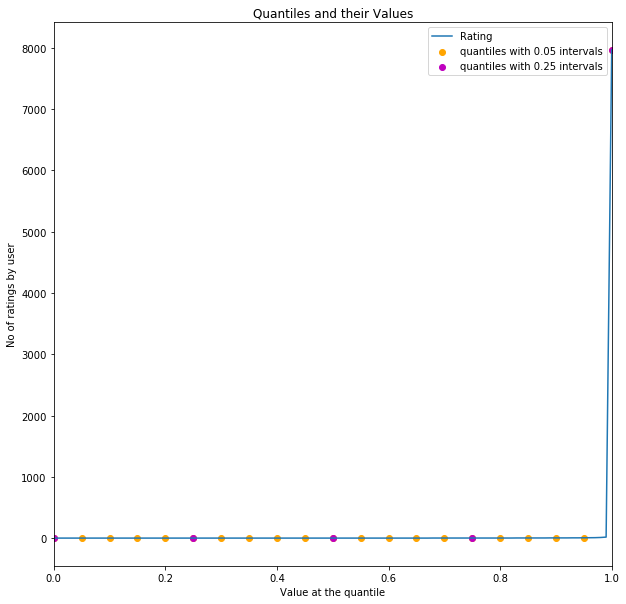

In [46]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [47]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 8262



## 2. Popularity based recommended systems

In [48]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=rating_data.groupby("productId").filter(lambda x:x['Rating'].count() >=50)


In [49]:
new_df

,userId,productId,Rating
3,32715830,014241543X,5
5,36205738,0399170863,2
17,30063158,0670025593,5
19,22297413,007179512X,5
28,11078146,1607747308,3
...,...,...,...
10319056,52451370,0894803123,5
10319058,47381473,0937381969,5
10319062,43165422,1601631987,5
10319069,12051324,0062059939,4


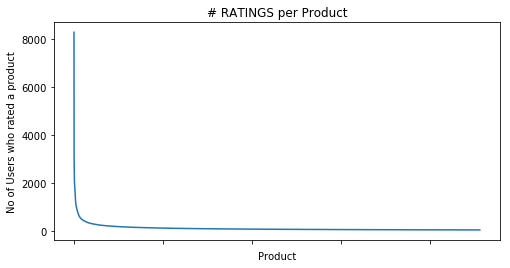

In [50]:
no_of_ratings_per_movie = new_df.groupby(by='productId')['Rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of Users who rated a product')
ax.set_xticklabels([])

plt.show()

In [51]:
#Average rating of the product 

new_df.groupby('productId')['Rating'].mean().head()

productId
0007320817    4.750000
0007398557    4.525641
0007442920    4.560976
0007455208    4.621622
0007466064    4.380531
Name: Rating, dtype: float64

In [52]:
new_df.groupby('productId')['Rating'].mean().sort_values(ascending=False).head()

productId
0615951945    5.0
1449772838    5.0
1612623972    5.0
193565487X    5.0
0692372334    5.0
Name: Rating, dtype: float64

In [53]:
#Total no of rating for product

new_df.groupby('productId')['Rating'].count().sort_values(ascending=False).head()


productId
0345803485    8267
034580404X    5137
1591451884    4407
1451695195    4067
030758836X    4014
Name: Rating, dtype: int64

In [54]:
ratings_mean_count = pd.DataFrame(new_df.groupby('productId')['Rating'].mean()) 

In [55]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('productId')['Rating'].count())

In [56]:
ratings_mean_count.head()


,Rating,rating_counts
productId,,
0007320817,4.750000,52
0007398557,4.525641,78
0007442920,4.560976,82
0007455208,4.621622,74
0007466064,4.380531,113


In [57]:
ratings_mean_count['rating_counts'].max()

8267

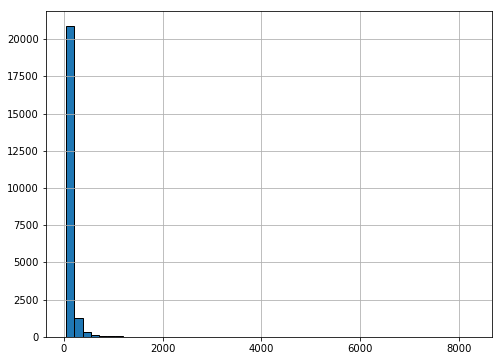

In [58]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

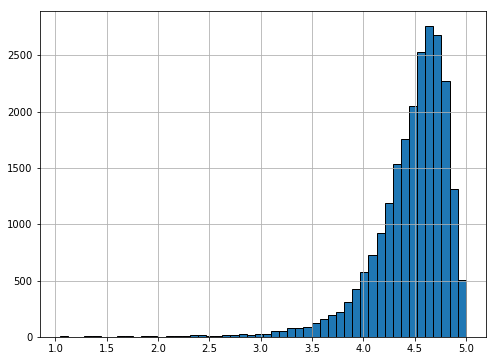

In [59]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

<Figure size 576x432 with 0 Axes>

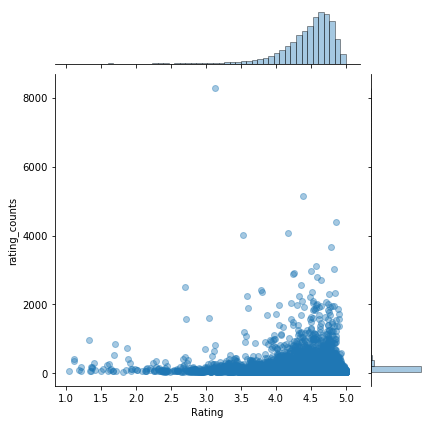

In [60]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

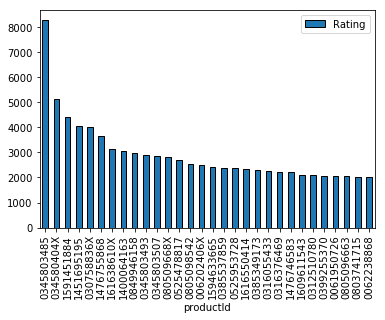

In [61]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")


## 4. Collaberative filtering (Item-Item recommedation)

In [62]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [63]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(new_df,reader)

In [64]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [65]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [ ]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [ ]:
test_pred

In [ ]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

## 5. Model-based collaborative filtering system


In [ ]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='Rating', index='userId', columns='productId', fill_value=0)
ratings_matrix.head()

As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.


In [ ]:
ratings_matrix.shape


Transposing the matrix



In [ ]:

X = ratings_matrix.T
X.head()

In [ ]:
X.shape


Unique products in subset of data



In [ ]:
X1 = X


In [ ]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape


In [ ]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape


 Isolating Product ID # B00000K135 from the Correlation Matrix¶


In [ ]:
X.index[75]


Index # of product ID purchased by customer



In [ ]:
i = X.index[75]

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

Recommending top 25 highly correlated products in sequence


In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

